In [1]:
! git clone https://github.com/data-psl/lectures2022
import sys
sys.path.append('lectures2022/notebooks/02_sklearn')
%cd 'lectures2022/notebooks/02_sklearn'

fatal: destination path 'lectures2022' already exists and is not an empty directory.
/Users/h.richard/Teaching/psl-intensive-week/lectures2023/notebooks/02_sklearn/lectures2022/notebooks/02_sklearn


In this notebook we define a Pipeline estimator that first apply a `PCA` and then classify the reduced representation using a `LogisticRegression`.

We will use the `Pipeline` object and the `GridSearchCV` object, as well as a little `pandas` in the end

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Now that you have all useful objects in hand, define a pipeline that first apply a PCA transform and then apply a LogisticRegression.
You may look at `Pipeline` documentation of scikit-learn

In [5]:
# %load "solutions/06-Pipeline-1.py"
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

The elements of the Pipeline are named and accessed using `estimator.get_params()`, and may be modified using `estimator.set_params()`

In [6]:
pipe.get_params()

{'memory': None,
 'steps': [('pca', PCA()),
  ('logistic', LogisticRegression(max_iter=10000, tol=0.1))],
 'verbose': False,
 'pca': PCA(),
 'logistic': LogisticRegression(max_iter=10000, tol=0.1),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 10000,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.1,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [7]:
pipe.set_params(pca__n_components=10)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('logistic', LogisticRegression(max_iter=10000, tol=0.1))])

## Performing a grid-search on multiple parameters

We want to test what reduction we should use in the `PCA`, along with what regularization in the `LogisticRegression`

How do we do that ? We use a `GridSearchCV` with multiple parameters

In [8]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)

In [9]:
search

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=10)),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'pca__n_components': [5, 15, 30, 45, 64]})

In [10]:
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

pca.fit(X_digits)

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


PCA(n_components=10)

Let's see how how the explained signal vary with the PCA size


Text(0.5, 0, 'n_components')

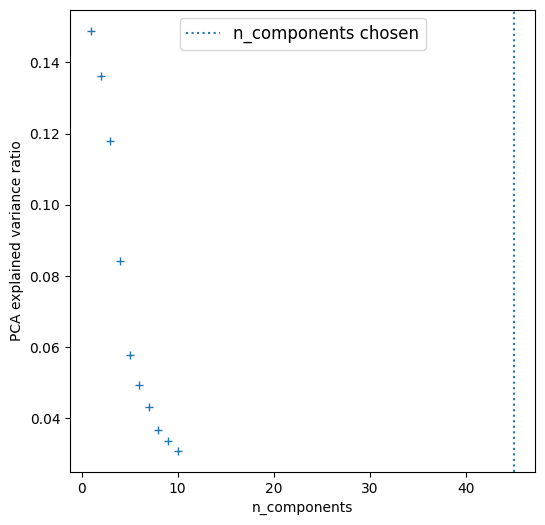

In [11]:
fig, ax0 = plt.subplots(nrows=1, figsize=(6, 6))


ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=4)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12), loc='upper center')

ax0.set_xlabel('n_components')


### Exploring grid-search

To explore the grid search results, we may transform the attribute `cv_results_` in a DataFrame.

**Question**: how many results should appear ?

In [ ]:
search.cv_results_

In [ ]:
results = pd.DataFrame(search.cv_results_)
results

Let's index these results by the hyper-parameters

In [ ]:
results = results.set_index(['param_pca__n_components','param_logistic__C']).sort_index()
results

In [ ]:
# Take the best C for each `n_components`
best_clfs = results.reset_index().groupby('param_pca__n_components').apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

In [ ]:
best_clfs

In [ ]:
fig, ax1 = plt.subplots(nrows=1, figsize=(6, 6))

best_clfs.plot(x='param_pca__n_components', y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

## Performing a grid-search on multiple parameters

We want to test what reduction we should use in the `PCA`, along with what regularization in the `LogisticRegression`

How do we do that ? We use a `GridSearchCV` with multiple parameters

In [ ]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)

In [ ]:
search

In [ ]:
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

Let's see how the explained signal vary with the PCA size


In [ ]:
fig, ax0 = plt.subplots(nrows=1, figsize=(6, 6))


ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=4)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12), loc='upper center')

ax0.set_xlabel('n_components')


### Exploring grid-search

To explore the grid search results, we may transform the attribute `cv_results_` in a DataFrame.

**Question**: how many results should appear ?

In [ ]:
search.cv_results_

In [ ]:
results = pd.DataFrame(search.cv_results_)
results

Let's index these results by the hyper-parameters

In [ ]:
results = results.set_index(['param_pca__n_components','param_logistic__C']).sort_index()
results

In [ ]:
# Take the best C for each `n_components`
best_clfs = results.reset_index().groupby('param_pca__n_components').apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

In [ ]:
best_clfs

In [ ]:
fig, ax1 = plt.subplots(nrows=1, figsize=(6, 6))

best_clfs.plot(x='param_pca__n_components', y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()